## COTTON (PLANT OR LEAF) DISEASE CLASSIFICATION (CNN MODEL).

### 1. Problem Statement:-
* Our problem statement is Classifying the given Cotton Plant Or Cotton Leaf is Diseased Or Fresh.
* As a machine learning enthusiast, I want to apply my machine learning knowledge to increase the productivity of cotton crops in India.
* If my model useful for one farmer also that means a lot to me, this idea drives me to do this project.

### 2. Data:-
* The Data is taken from the Kaggle Dataset.
* https://www.kaggle.com/datasets/janmejaybhoi/cotton-disease-dataset.

### 3. Evaluation:-
* The evaluation is a file with prediction probabilities for each cotton plants of each test images.

### Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import cv2
import tensorflow as tf 
import keras 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

### Load Dataset

In [11]:
train_data_path=r'C:\Users\GNULR\DATA SCIENCE\12. END TO END PROJECT\Cotton Disease\train'
validation_data_path=r'C:\Users\GNULR\DATA SCIENCE\12. END TO END PROJECT\Cotton Disease\val'

### Data Agumentation

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
training_datagen=ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                              zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [16]:
## Here we are selecting size of all images to 150*150.
## we are creating an batch size of 32 to pass the iamges.
## since we use binary_cross entropy loss , we need binary labels.

training_data=training_datagen.flow_from_directory(train_data_path,
                                             target_size=(150,150),
                                             batch_size=32,
                                             class_mode='binary')

Found 1951 images belonging to 4 classes.


In [17]:
## Totally we have 4 classes here.
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [18]:
valid_datagen=ImageDataGenerator(rescale=1./255)
valid_data=valid_datagen.flow_from_directory(validation_data_path,
                                             target_size=(150,150),
                                             batch_size=32,
                                             class_mode='binary')

Found 253 images belonging to 4 classes.


In [19]:
valid_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [20]:
## function for plotting agumented class images.

def plotImages(images_arr):
    fig,axes=plt.subplots(1, 5, figsize=(20,20))
    axes=axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

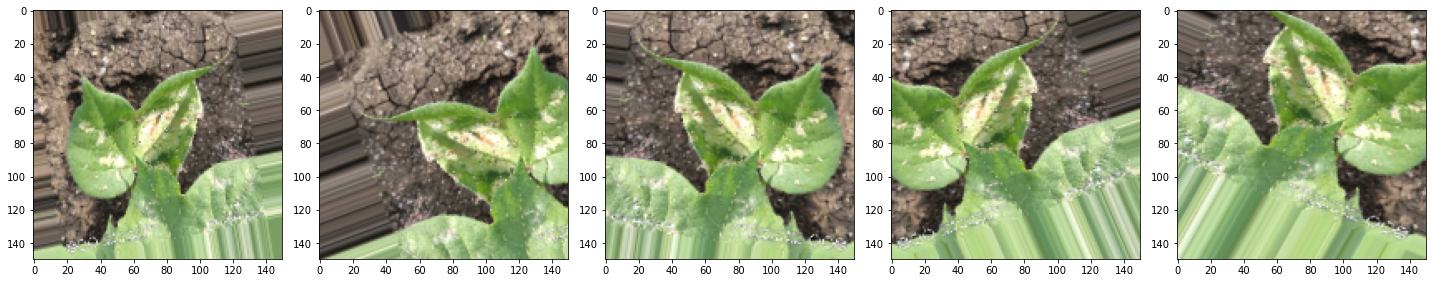

In [21]:
## Plotting train augmented images.
images=[training_data[0][0][0] for i in range(5)]
plotImages(images)

### Steps for Building a Convolution Neural Network (CNN).

* **Building model:** Defining Architecture

* **Compile:** Giving metadata(like loss, optimizer)

* **Fit the model**

### 1. Building Model 

In [11]:
## Save the best model using validation accuracy.

model_path=r'C:\Users\GNULR\DATA SCIENCE\11. END TO END PROJECT\5. COTTON (PLANT OR LEAF) DISEASE CLASSIFICATION.h5'
checkpoint=ModelCheckpoint(model_path,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_list=[checkpoint]

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.layers import Dropout

In [13]:
cnn_model=Sequential()

In [14]:
cnn_model.add(Conv2D(filters=32,kernel_size=3,input_shape=[150,150,3]))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(filters=64,kernel_size=3))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(filters=128,kernel_size=3))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(filters=256,kernel_size=3))
cnn_model.add(MaxPooling2D(2,2))

cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())

cnn_model.add(Dense(128,activation='relu'))  ## Input layers.
cnn_model.add(Dropout(0.1))

cnn_model.add(Dense(256,activation='relu'))  ## Hidden layers.
cnn_model.add(Dropout(0.25))

cnn_model.add(Dense(4,activation='softmax'))  ## Output Layers.


### 2. Compilation

In [15]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

### 3. Fit the Model

In [17]:
### Epochs :- How many times our model will go through data
## Batch size :- How much amount of data at once you wanna pass through the model
### validation_split :- How much amount of data (in this case its 20 %) you will need to check cross validation error

history=cnn_model.fit(training_data,
                     epochs=50,
                     verbose=1,
                     validation_data=valid_data,
                     callbacks=callbacks_list)
                     

Epoch 1/50
61/61 [==============================] - ETA: 0s - loss: 1.1675 - accuracy: 0.5013
Epoch 1: val_accuracy improved from -inf to 0.65217, saving model to C:\Users\GNULR\DATA SCIENCE\11. END TO END PROJECT\5. COTTON (PLANT OR LEAF) DISEASE CLASSIFICATION.h5
61/61 [==============================] - 55s 871ms/step - loss: 1.1675 - accuracy: 0.5013 - val_loss: 0.8771 - val_accuracy: 0.6522
Epoch 2/50
61/61 [==============================] - ETA: 0s - loss: 1.0109 - accuracy: 0.5771
Epoch 2: val_accuracy improved from 0.65217 to 0.66403, saving model to C:\Users\GNULR\DATA SCIENCE\11. END TO END PROJECT\5. COTTON (PLANT OR LEAF) DISEASE CLASSIFICATION.h5
61/61 [==============================] - 48s 782ms/step - loss: 1.0109 - accuracy: 0.5771 - val_loss: 0.8780 - val_accuracy: 0.6640
Epoch 3/50
61/61 [==============================] - ETA: 0s - loss: 0.9400 - accuracy: 0.6135
Epoch 3: val_accuracy did not improve from 0.66403
61/61 [==============================] - 47s 774ms/step 

61/61 [==============================] - ETA: 0s - loss: 0.3323 - accuracy: 0.8739
Epoch 26: val_accuracy improved from 0.92885 to 0.93281, saving model to C:\Users\GNULR\DATA SCIENCE\11. END TO END PROJECT\5. COTTON (PLANT OR LEAF) DISEASE CLASSIFICATION.h5
61/61 [==============================] - 58s 947ms/step - loss: 0.3323 - accuracy: 0.8739 - val_loss: 0.2241 - val_accuracy: 0.9328
Epoch 27/50
61/61 [==============================] - ETA: 0s - loss: 0.3317 - accuracy: 0.8795
Epoch 27: val_accuracy did not improve from 0.93281
61/61 [==============================] - 62s 1s/step - loss: 0.3317 - accuracy: 0.8795 - val_loss: 0.1900 - val_accuracy: 0.9170
Epoch 28/50
61/61 [==============================] - ETA: 0s - loss: 0.2933 - accuracy: 0.8944
Epoch 28: val_accuracy improved from 0.93281 to 0.94862, saving model to C:\Users\GNULR\DATA SCIENCE\11. END TO END PROJECT\5. COTTON (PLANT OR LEAF) DISEASE CLASSIFICATION.h5
61/61 [==============================] - 60s 982ms/step - loss

#### * At the end of the 50th epoch

* training_data_set_accuracy = 0.89
* Valdation_data_set_accuracy=0.85

### Epoch vs Loss

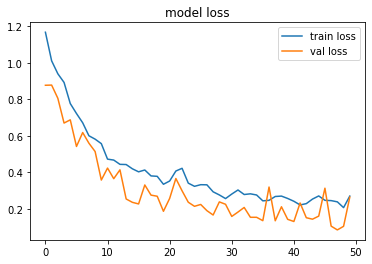

In [18]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.title('model loss')
plt.show()

### Epoch vs Accuracy

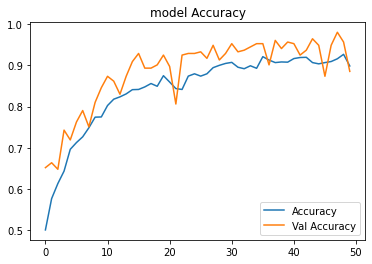

In [19]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.legend()
plt.title('model Accuracy')
plt.show()

### Model Evaluation 

* **Now we gonna import test data sets to the trained model to predict the images**.

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

#### Load Image 

In [36]:
img=image.load_img(r'C:\Users\GNULR\DATA SCIENCE\12. END TO END PROJECT\Cotton Disease\test\fresh cotton leaf\d (7)_iaip.jpg',
                  target_size=(150,150))

In [37]:
x=image.img_to_array(img)/255

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
result=cnn_model.predict(x).round(3)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/conv2d/BiasAdd' defined at (most recent call last):
    File "C:\Users\GNULR\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\GNULR\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\GNULR\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\GNULR\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\GNULR\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\GNULR\AppData\Local\Temp\ipykernel_21944\2465023214.py", line 1, in <cell line: 1>
      result=cnn_model.predict(x).round(3)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\layers\convolutional\base_conv.py", line 304, in call
      outputs = tf.nn.bias_add(
Node: 'sequential/conv2d/BiasAdd'
input must be 4-dimensional[32,150,3]
	 [[{{node sequential/conv2d/BiasAdd}}]] [Op:__inference_predict_function_17775]

In [40]:
pred=np.argmax(result)

Predictions>>> fresh cotton leaf


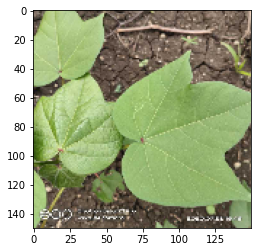

In [41]:
if pred == 0:                                                      
    print('Predictions>>> diseased cotton leaf')                                                  
if pred == 1:
    print('Predictions>>> diseased cotton plant')   
if pred == 2:
    print('Predictions>>> fresh cotton leaf')    
if pred == 3:
    print('fresh cotton plant')
    
pred

plt.imshow(x)


#### * By this, we can conclude our trained model working as generalization model.

### Transfer Learning
* Transfer learning is the reuse of a pre-trained model on a new problem. It’s currently very popular in deep learning because it can train deep neural networks with comparatively little data.

* **Famous Pretained Models**

* Resnet50 : 25,636,712 parameters

* Resnet152V2 : 60,380,648 parameters

* InceptionV3 : 23,851,784 parameters

#### I choose InceptionV3 because it has fewer parameters compared to other models, fewer parameters leads to less time to response.

* Inceptionv3 consists of two parts: (i) Feature extraction (ii) Convolutional neural network

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [2]:
## add only one dense layer(units=no_of_classes,activation=softmax).
## We have 4 classes , so we need 4 units in dense layer and activation is softmax.
## We apply softmax activation on Bottle_neck_layer_output.

### Steps for Building a Convolution Neural Network (CNN).
1. Building model: Defining Architecture
2. Compile: Giving metadata(like loss, optimizer)
3. Fit the model

### 1. Building Model

In [3]:
conv_base= InceptionV3(weights='imagenet',
                      include_top=False,
                      input_shape=(150,150,3))

In [4]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 3, 3, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 3, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [5]:
model=Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 26,522,660
Trainable params: 26,488,228
Non-trainable params: 34,432
_________________________________________________________________


### 2. Compilation

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 26,522,660
Trainable params: 26,488,228
Non-trainable params: 34,432
_________________________________________________________________


### 3.Fit the Model

In [22]:
history=model.fit(training_data,
                     epochs=10,
                     verbose=1,
                     validation_data=valid_data,
                      )

Epoch 1/10
61/61 [==============================] - 250s 4s/step - loss: 1.1294 - accuracy: 0.7058 - val_loss: 7.4585 - val_accuracy: 0.3320
Epoch 2/10
61/61 [==============================] - 224s 4s/step - loss: 0.3651 - accuracy: 0.8795 - val_loss: 41.8056 - val_accuracy: 0.6759
Epoch 3/10
61/61 [==============================] - 228s 4s/step - loss: 0.2610 - accuracy: 0.9200 - val_loss: 99.1921 - val_accuracy: 0.6838
Epoch 4/10
61/61 [==============================] - 2490s 41s/step - loss: 0.2562 - accuracy: 0.9211 - val_loss: 1.1427 - val_accuracy: 0.7510
Epoch 5/10
61/61 [==============================] - 200s 3s/step - loss: 0.2226 - accuracy: 0.9349 - val_loss: 200.7262 - val_accuracy: 0.6877
Epoch 6/10
61/61 [==============================] - 223s 4s/step - loss: 0.2149 - accuracy: 0.9370 - val_loss: 2.5853 - val_accuracy: 0.9051
Epoch 7/10
61/61 [==============================] - 224s 4s/step - loss: 0.2513 - accuracy: 0.9318 - val_loss: 7.6679 - val_accuracy: 0.7589
Epoch 8

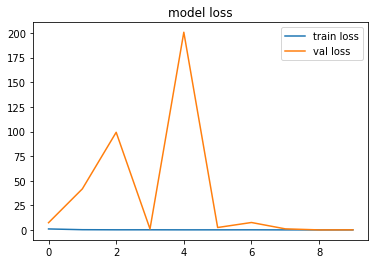

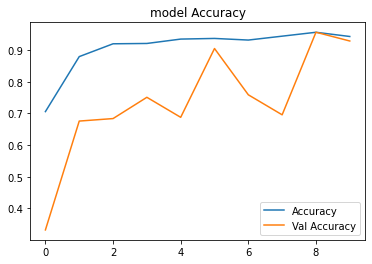

In [23]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.title('model loss')
plt.show()


plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.legend()
plt.title('model Accuracy')
plt.show()

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [31]:
img=image.load_img(r'C:\Users\GNULR\DATA SCIENCE\12. END TO END PROJECT\Cotton Disease\test\fresh cotton leaf\d (7)_iaip.jpg',
                  target_size=(150,150))

In [32]:
x=image.img_to_array(img)/255

In [27]:
x=np.expand_dims(x,axis=0)

In [33]:
result=model.predict(x).round(3)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/inception_v3/activation/Relu' defined at (most recent call last):
    File "C:\Users\GNULR\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\GNULR\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\GNULR\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\GNULR\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\GNULR\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\GNULR\AppData\Local\Temp\ipykernel_21132\4133827544.py", line 1, in <cell line: 1>
      result=model.predict(x).round(3)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\layers\core\activation.py", line 59, in call
      return self.activation(inputs)
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\GNULR\Anaconda3\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential/inception_v3/activation/Relu'
input must be 4-dimensional[32,150,3]
	 [[{{node sequential/inception_v3/activation/Relu}}]] [Op:__inference_predict_function_26370]

In [34]:
pred=np.argmax(result)

Predictions>>> fresh cotton leaf


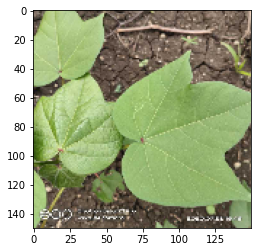

In [35]:
if pred == 0:                                                      
    print('Predictions>>> diseased cotton leaf')                                                  
if pred == 1:
    print('Predictions>>> diseased cotton plant')   
if pred == 2:
    print('Predictions>>> fresh cotton leaf')    
if pred == 3:
    print('fresh cotton plant')
    
pred

plt.imshow(x)



###  Conclusion :

####  1. CNN model
* Total params: 2,028,228
* Trainable params: 2,028,228
* No of Epochs : 50
* training_data_set_accuracy = 0.89
* Valdation_data_set_accuracy=0.85

#### 2. InceptionV3 model
* Total params: 26,522,660
* Trainable params: 26,488,228
* No of Epochs : 10
* training_data_set_accuracy = 0.94
* Valdation_data_set_accuracy=0.92

* It’s always better to use a Transfer Learning model because it can train deep neural networks with fewer data and it also       gives good accuracy compared to CNN from scratch.
